#### **This notebook checks the follower and following of the repliers**

In [1]:
import pandas as pd
import numpy as np

import importlib

#### packages
import helper.visualization as vz_hp

#### **Load data**

In [2]:
config = config_hp.config()
user_processed = config['USER_FEATURES']

follow_following_ratio = user_processed['follow_following_ratio']

df_merge = pd.read_pickle(follow_following_ratio)

In [3]:
df_merge.columns

Index(['replier_userid', 'replier_label', 'created_at', 'following_count',
       'followers_count', 'year', 'year_filter', 'created_at_year', 'age',
       'followers_ratio', 'following_ratio'],
      dtype='object')

In [4]:
df_merge['replier_userid'].nunique()

881918

./plots/CCDF_follower_count_replier.png


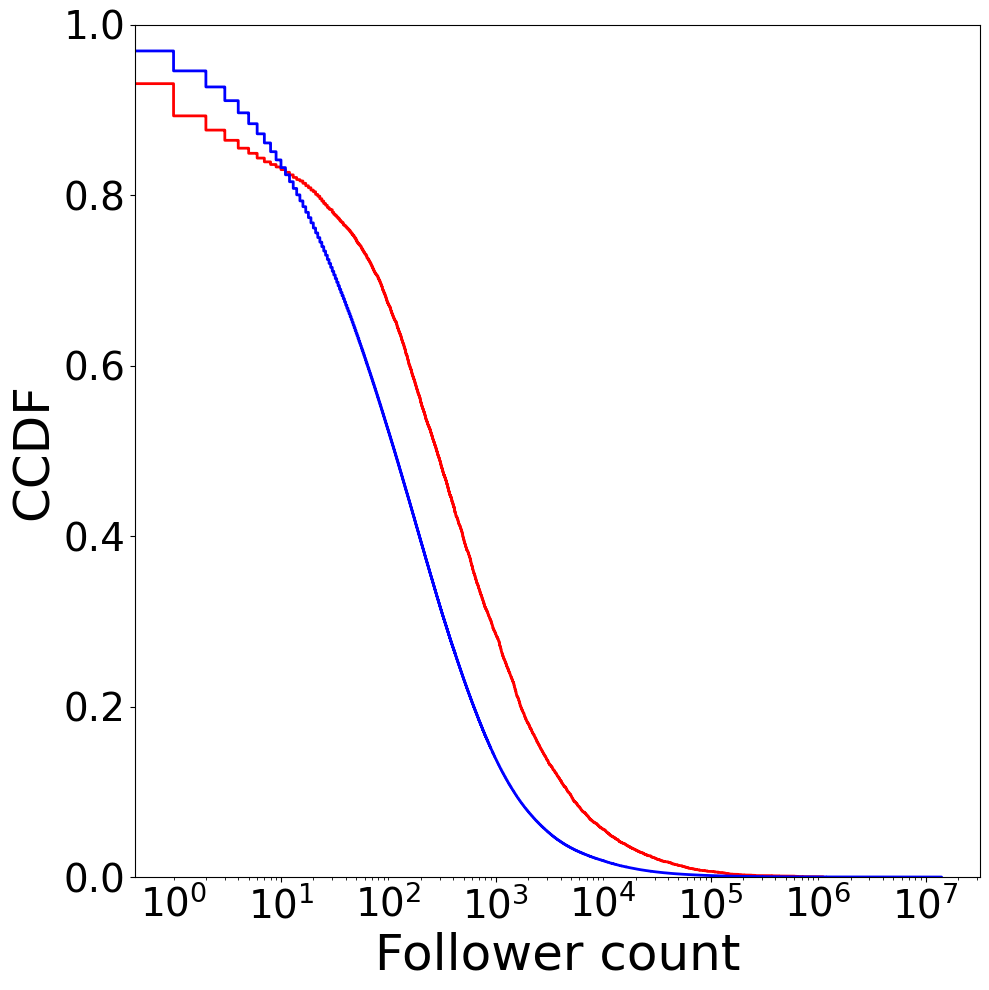

In [5]:
import helper.visualization as viz_hp

importlib.reload(config_hp)
importlib.reload(viz_hp)

df_all_pos_men = df_merge.loc[
    df_merge['replier_label'] == 1
]
df_all_neg_men = df_merge.loc[
    df_merge['replier_label'] == 0
]

parameters = {
        'data': [df_all_pos_men, 
                 df_all_neg_men
                ],
    
        'figsize': (10, 10),
        'fontsize': 36,
        'tick_size': 28,
        'complementary': True,
    
        'columns': [
            {'column': 'followers_count',
             'label': 'IO replier',
            },{
            'column': 'followers_count',
             'label': 'Normal replier'
            },
        ],
        'xlabel': 'Follower count',
        'ylabel': 'CCDF',
        'log_xscale': True,
        'save': {
            'path': './plots',
            'filename': 'CCDF_follower_count_replier.png'
        },
        'random_color': False
}


viz_hp.ccdf(parameters)

In [8]:
print('IO follower ', df_all_pos_men['followers_count'].median())
print('Control follower ', df_all_neg_men['followers_count'].median())

IO follower  282.0
Control follower  114.0


./plots/CCDF_following_count_replier.png


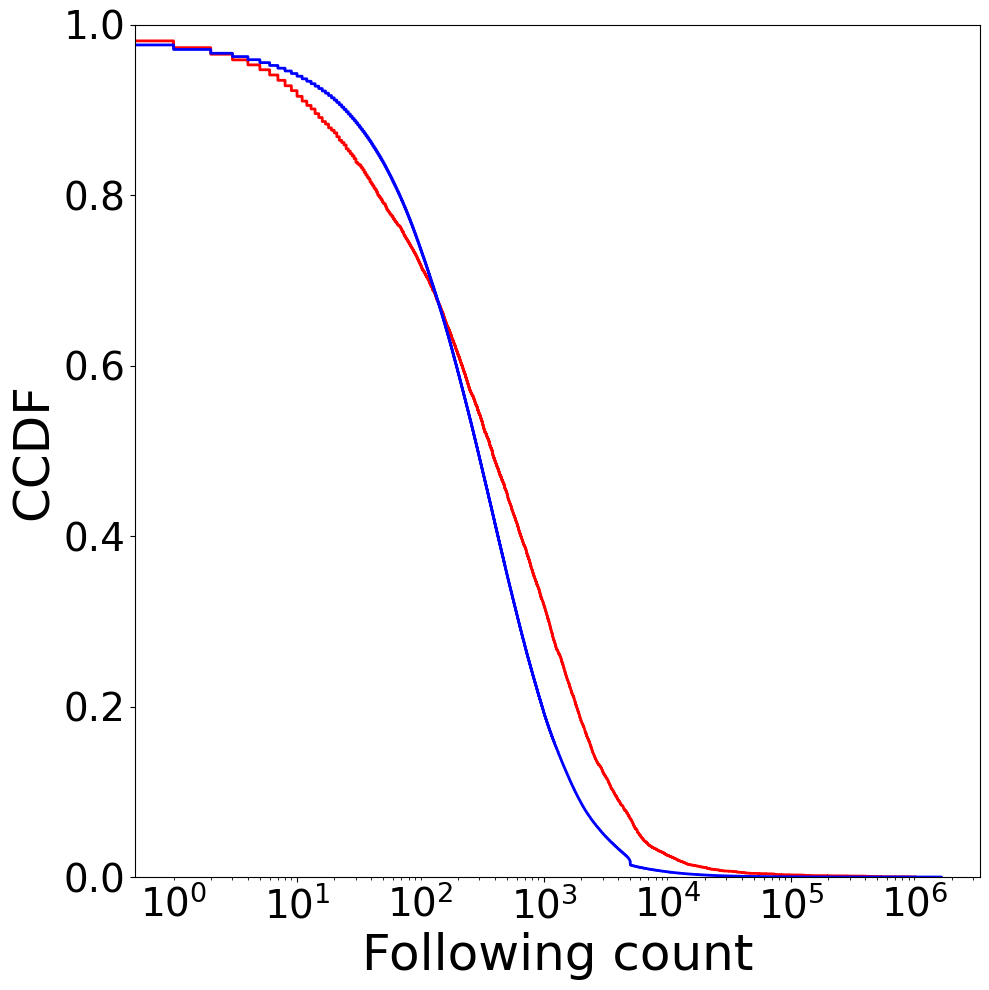

In [6]:
import helper.visualization as viz_hp

importlib.reload(config_hp)
importlib.reload(viz_hp)

df_all_pos_men = df_merge.loc[
    df_merge['replier_label'] == 1
]
df_all_neg_men = df_merge.loc[
    df_merge['replier_label'] == 0
]

parameters = {
        'data': [df_all_pos_men, 
                 df_all_neg_men
                ],
    
        'figsize': (10, 10),
        'fontsize': 36,
        'tick_size': 28,
        'complementary': True,
    
        'columns': [
            {'column': 'following_count',
             'label': 'IO replier',
            },{
            'column': 'following_count',
             'label': 'Normal replier'
            },
        ],
        'xlabel': 'Following count',
        'ylabel': 'CCDF',
        # 'legend_location': 'upper right',
        # 'log_yscale': True,
        'log_xscale': True,
        'save': {
            'path': './plots',
            'filename': 'CCDF_following_count_replier.png'
        },
        'random_color': False
}


viz_hp.ccdf(parameters)

In [9]:
print('IO following ', df_all_pos_men['following_count'].median())
print('Control following ', df_all_neg_men['following_count'].median())

IO following  380.0
Control following  292.0


In [28]:
df_io = df_merge.loc[df_merge['replier_label'] == 1]
df_non_io = df_merge.loc[df_merge['replier_label'] == 0]

print('Mean followers count : IO : ', df_io['followers_count'].median())
print('Mean followers count : Non IO :', df_non_io['followers_count'].median())
print('****************')
print('Mean following count : IO: ', df_io['following_count'].median())
print('Mean following count : Non IO: ', df_non_io['following_count'].median())

Mean followers ratio : IO :  698.4674980496866
Mean followers ratio : Non IO : 190.39355849843528
****************
Mean following ratio : IO:  482.5403879629286
Mean following ratio : Non IO:  113.46782743788482
***********************************************
Mean followers count : IO :  282.0
Mean followers count : Non IO : 114.0
****************
Mean following count : IO:  380.0
Mean following count : Non IO:  292.0
